<a href="https://colab.research.google.com/github/archanadby05/Neural_Network_from_Scratch/blob/master/basic-neural-networks/Perceptron_XOR_fail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **XOR Problem**




The XOR (exclusive OR) gate has an output of `1` only when the inputs differ, i.e., `(0, 1)` or `(1, 0)`.

The problem with XOR is that it's **not linearly separable**—there is no straight line that can separate the `1`s from the `0`s.

## **01. Defining inputs and outputs for XOR gate**

We define the inputs and the expected outputs for the XOR gate. These values represent the truth table for XOR:

In [1]:
import numpy as np

# XOR gate inputs and expected outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 0])

## **02. Train Perceptron on XOR data**

Now we define the perceptron class, with methods for training (`fit`) and prediction (`predict`).

It uses a simple step function to output either `1` or `0.

In [2]:
class Perceptron:
    def __init__(self, input_dim, learning_rate=0.1, epochs=1000):
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_dim)
        self.bias = 0

    def step_function(self, x):
        if x >= 0:
          return 1
        else:
          return 0

    def fit(self, X, y):
        for epoch in range(self.epochs):
            for inputs, label in zip(X, y):
                weighted_sum = np.dot(inputs, self.weights) + self.bias
                prediction = self.step_function(weighted_sum)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def predict(self, X):
        return [self.step_function(np.dot(inputs, self.weights) + self.bias) for inputs in X]

In [3]:
# Initialize
perceptron = Perceptron(input_dim=2)

# Train
perceptron.fit(inputs, labels)

# Predict
predictions = perceptron.predict(inputs)
print("Perceptron predictions for XOR:", predictions)

Perceptron predictions for XOR: [1, 1, 0, 0]


## **03. Failed on XOR - (No learning)**

Since XOR is not linearly separable, the perceptron will not be able to learn this function correctly, no matter how many epochs we train for.

You should observe that the perceptron’s predictions for XOR do not match the expected output.

### **Why Does It Fail?**
The perceptron fails because XOR is **non-linearly separable**. The perceptron algorithm assumes linear separability (i.e., a straight line can separate classes), but XOR requires a more complex decision boundary, which the perceptron cannot learn.

## **03. Visualize the Output**



In [4]:
import matplotlib.pyplot as plt

In [5]:
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = np.array(model.predict(grid_points)).reshape(xx.shape)

    plt.contourf(xx, yy, predictions, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()

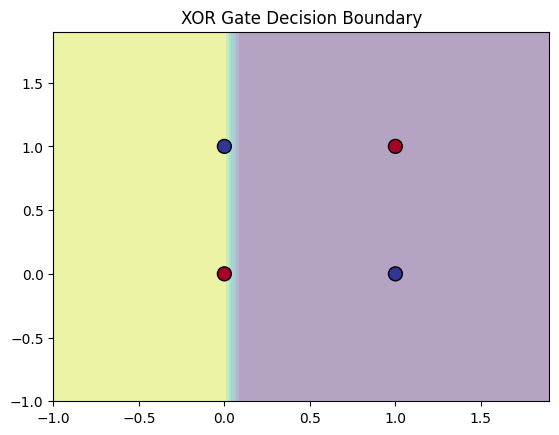

In [6]:
plot_decision_boundary(inputs, labels, perceptron, title="XOR Gate Decision Boundary")

## **Conclusion**
This optional step visualizes the decision boundary the perceptron creates after training. Since XOR is non-linearly separable, the perceptron will not generate an accurate decision boundary.